<a href="https://colab.research.google.com/github/pikaybh/SNU-Ambient-AI/blob/main/HW1_2023_22785_ByungHeeYoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1(~1/11)
HW1_학번_이름.ipynb 형태로 저장하여 Jupyter Notebook을 그대로 제출! <br>
(예: HW1_2020_12345_keondo.ipynb) <br>
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from sklearn import model_selection
import matplotlib.pyplot as plt

## Problem 1: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

In [ ]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

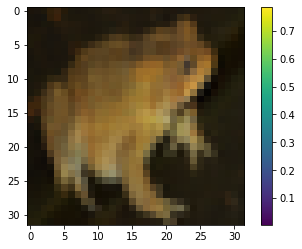

In [ ]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

---
여기부터 수강생의 코드를 추가하시오

## My code from here

---

### Build Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation = "softmax")
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optim_fn = tf.keras.optimizers.Adam(lr = 0.001)

model.compile(optimizer = optim_fn,
              loss = loss_fn,
              metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-tr

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Model Training

In [ ]:
hist = model.fit(x_train, y_train, 
                 epochs = 100, 
                 validation_data = (x_valid, y_valid))

Epoch 1/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5651 - accuracy: 0.4403 - val_loss: 1.5393 - val_accuracy: 0.4510
Epoch 2/100
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5505 - accuracy: 0.4451 - val_loss: 1.5966 - val_accuracy: 0.4204
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5429 - accuracy: 0.4450 - val_loss: 1.5462 - val_accuracy: 0.4427
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5326 - accuracy: 0.4514 - val_loss: 1.5288 - val_accuracy: 0.4552
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5203 - accuracy: 0.4541 - val_loss: 1.5238 - val_accuracy: 0.4589
Epoch 6/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5133 - accuracy: 0.4573 - val_loss: 1.5412 - val_accuracy: 0.4504
Epoch 7/100
1250/1250 [==============================] - 12s 9ms/step - loss: 1.5016 - accuracy: 0.4586 - val_loss: 1.5345 - val_a

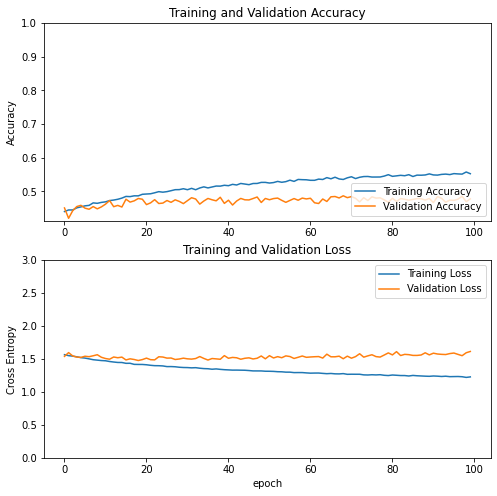

In [ ]:
# Get Training accuray & Validation accuracy from history
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]

# Get Training loss & Validation loss from history
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

# Let's visualize accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.ylabel("Accuracy")
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Validation Accuracy")

# Let's visualize loss
plt.subplot(2, 1, 2)
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend(loc = "upper right")
plt.ylabel("Cross Entropy")
plt.ylim([0, 3.0])
plt.title("Training and Validation Loss")
plt.xlabel("epoch")

plt.show()

### Model Evaluation

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 1.5908 - accuracy: 0.4716 - 864ms/epoch - 3ms/step


[1.5907838344573975, 0.4715999960899353]

In [ ]:
# Predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
import numpy as np

# Plot image with label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)
  
# Plot
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "gray")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  _ = plt.xticks(range(10), class_names, rotation = 45)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

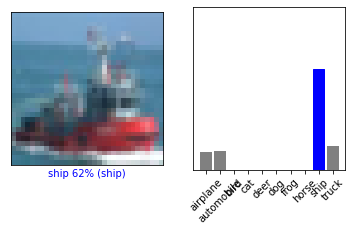

In [ ]:
import random

i = random.randrange(len(x_test))  # Which index to check the result?
plt.figure(figsize=(6,3))

# Plot the image and predicted class / true class
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)

# Plot predicted probability
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)

plt.show()

## Problem 2: 간단한 ResNet 구현

다음은 MLP layer만을 간단하게 구현한 ResNet-11 모델의 구조이다. 

`ResBlock`함수를 작성한 다음 `ResNet11`함수를 이용하여 ResNet-11를 구현해보자.
- 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
- 조건2: 마지막 Layer의 node 수는 10개이다.
- 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다. 
![resnet11.png](attachment:resnet11.png)


ResNet에 대해서는 다음 문서 참조:(https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 

In [ ]:
!pip install pydot pydotplus graphviz  # then kernel restart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

In [ ]:
def ResBlock(x, nodes):
    # 우회
    shortcut = x

    # 비우회
    x = Dense(nodes, activation='relu')(x)
    x = Dense(nodes, activation='relu')(x)

    # 집결
    # outputs = x + shortcut
    x = Add()([x, shortcut])
    
    return x    

In [ ]:
def ResNet11():
    inputs = Input(shape=(224, 224, 3))    
    x = Flatten()(inputs)
    x = Dense(100)(x)

    x = ResBlock(x, 100)
    x = ResBlock(x, 200)
    x = ResBlock(x, 200)
    
    outputs = Dense(10, activation='softmax')(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
resnet11 = ResNet11()

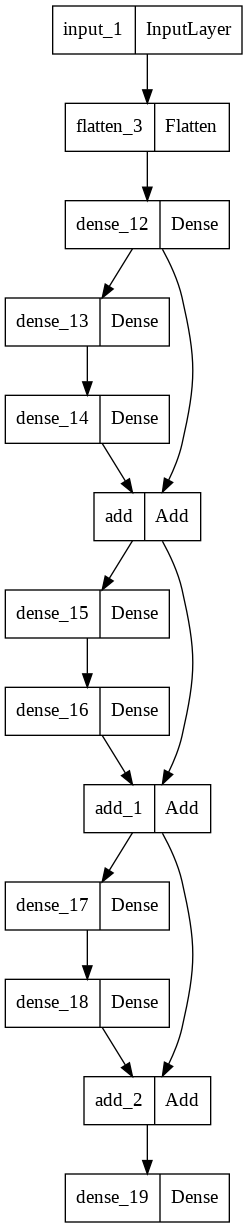

In [ ]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png')